<a href="https://colab.research.google.com/github/valesierrai/Aprendizaje-No-Supervisado-para-el-AD/blob/main/Manipulacion_texto_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El objetivo de esta clase es tener un acercamiento con el procesamiento de lenguaje natural, donde nos centraremos en la cantidad de Bag of Words para una cantidad grande de documentos.

* Tokens

* Documentos

* Bag of Words

Considerando los datos de la red social Twitter (X) [fuente de datos](https://www.kaggle.com/datasets/vstepanenko/disaster-tweets), se tiene una cantidad de tuits asociados a accidentes, incendios forestales y covid-19.


In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/drive')
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import re # paquete 2 de lenguaje natural
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # graficos de palabras

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

Mounted at /content/drive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

A continuación, tenemos un conjunto de tuits, crearemos tokens e identificaremos la cantidad de bag of words.

In [ ]:
datos_x=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje No Supervisado/tweets.csv")
datos_x["text"]

,text
0,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,Telangana: Section 144 has been imposed in Bha...
2,Arsonist sets cars ablaze at dealership https:...
3,Arsonist sets cars ablaze at dealership https:...
4,"""Lord Jesus, your love brings freedom and pard..."
...,...
11365,Media should have warned us well in advance. T...
11366,i feel directly attacked 💀 i consider moonbin ...
11367,i feel directly attacked 💀 i consider moonbin ...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T..."


# Documento

Para este caso vamos a considerar un solo documento.

In [ ]:
texto = datos_x["text"].loc[0]
texto

'Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'

Inicialmente se pasa el texto a minúscula o mayúscula, en la práctica se pasa a minúscula.

In [ ]:
#Pasamos todo a miniscula
texto = texto.lower()
texto

'communal violence in bhainsa, telangana. "stones were pelted on muslims\' houses and some houses and vehicles were set ablaze…'

In [ ]:
#Con split podemos determinar un caracter para separar las palabras
texto.split(".")

['communal violence in bhainsa, telangana',
 ' "stones were pelted on muslims\' houses and some houses and vehicles were set ablaze…']

In [ ]:
#Separa por espacios, \n, multiples espacios
tokens = texto.split( )
print( "Tokens: ", tokens )
#len cantidad de elementos en la lista
print("Cantidad tokens:",len(tokens ))

Tokens:  ['communal', 'violence', 'in', 'bhainsa,', 'telangana.', '"stones', 'were', 'pelted', 'on', "muslims'", 'houses', 'and', 'some', 'houses', 'and', 'vehicles', 'were', 'set', 'ablaze…']
Cantidad tokens: 19


Ahora para definir el Bag of Words es con la cantidad de tokens únicos, utilizando la función set, podemos obtener los valores únicos de una lista.

In [ ]:
#Cantidad de tokens (palabras) únicos (Bag of Words)
print( "Bag of words: ", set(tokens)  )
print("Cantidad Bag of words: ",len(set(tokens) ))

Bag of words:  {'houses', 'ablaze…', 'pelted', 'telangana.', 'bhainsa,', 'in', 'on', '"stones', 'were', "muslims'", 'and', 'some', 'set', 'violence', 'communal', 'vehicles'}
Cantidad Bag of words:  16


Se observan problemas como las comillas y signos de puntuación, pero principalmente los stop words, in, on, and puede que no den mucha información.

Con  la librería nlk, existe una lista de stopword que ya se consideraron como stop words de manera general, sin embargo, esta se puede modificar a conveniencia.


# Stop Words

Con la librería de nltk, se tiene una lista de stop words predeterminadas, que se han considerado stop word de manera genérica para diferentes idiomas, esto no significa que dicha lista no se pueda modificar, ya sea quitando o añadiendo nuevas palabras que consideremos un stop word.

*Son palabras que se repiten mucho, y no dan valor alguno.

In [ ]:
#Mostramos las stop words en ingles
stop_words_nltk_en =list(set(stopwords.words('english')))
print(stop_words_nltk_en)
len(stop_words_nltk_en)

['t', "hadn't", 've', 'where', 'over', 'isn', 'shan', "you'd", 'shouldn', 'with', 'were', "won't", 'out', 'those', 'both', "mightn't", 'same', 'll', 'in', 'should', "wasn't", 'what', 'does', 'has', 'yourselves', 'am', 'no', "should've", 'don', 'hasn', 'y', 'themselves', 'but', 'during', 'himself', 'yours', 'him', 're', "shan't", 'do', 'an', 'whom', 'then', 'each', 'below', 'have', 'didn', 'down', 'that', 'the', 'me', 'your', 'which', 'did', 'nor', 'of', "aren't", 'my', 'who', 'by', 'itself', "mustn't", "that'll", 'some', 'if', 'off', 'under', "didn't", 'was', 'wouldn', 'needn', 'when', 'ain', 'aren', "you're", 'i', 'ours', 'its', 'through', 'once', 'will', "you'll", 'is', 'too', "wouldn't", 'won', 'and', 'mightn', 'we', 'are', 'her', 'hadn', "hasn't", "haven't", 'doesn', 'before', "you've", 'most', 'ourselves', 'she', 'they', 'or', 'a', 'o', 'had', 'myself', 'be', 'having', 'ma', 'here', 'all', 'as', 'while', 'on', 'further', 'his', 'just', 'very', "needn't", 'their', 'yourself', 'thei

179

In [ ]:
#Mostramos las stop words en español
stop_words_nltk_es =list(set(stopwords.words('spanish')))
print(stop_words_nltk_es)
len(stop_words_nltk_es)

['tuviesen', 'los', 'estás', 'habido', 'suya', 'vosotras', 'tuve', 'tenido', 'mía', 'habremos', 'hemos', 'tuvierais', 'eres', 'fueseis', 'tenemos', 'unos', 'de', 'más', 'vuestras', 'estará', 'fuerais', 'antes', 'quienes', 'habéis', 'otro', 'ellas', 'están', 'habrás', 'en', 'éramos', 'estaremos', 'ni', 'como', 'suyo', 'muchos', 'estuviera', 'esta', 'nosotras', 'esto', 'seas', 'sus', 'tuviese', 'tenidas', 'otra', 'a', 'hayan', 'fuimos', 'o', 'desde', 'uno', 'hayas', 'sobre', 'estaré', 'tuvieras', 'tienes', 'es', 'tuyo', 'e', 'ellos', 'yo', 'esté', 'estéis', 'nuestros', 'habiendo', 'ante', 'mías', 'estábamos', 'tuvimos', 'hayamos', 'todos', 'suyos', 'hubimos', 'tendréis', 'cual', 'estamos', 'os', 'he', 'hubiesen', 'fuera', 'para', 'hasta', 'se', 'tened', 'nos', 'te', 'míos', 'estuvieran', 'nuestras', 'estuviésemos', 'hay', 'estaréis', 'estaríamos', 'fuésemos', 'tenían', 'estuviéramos', 'serían', 'tus', 'hubiera', 'nuestra', 'fuiste', 'tuyos', 'tuvisteis', 'tuviera', 'hubieran', 'tendrán',

313

La idea es remover los stop words es reducir la cantidad de Bag of Words y reducir información redundante.

# Ciclos con lista indexada

En Python podemos incorporar un for dentro de una lista, este tipo de ciclos son más eficientes que la sintaxis inicial de los ciclos for.


```python
['valor' for 'valor' in 'lista' 'condicional: if valor cumple condición']
```


In [ ]:
tokens

['communal',
 'violence',
 'in',
 'bhainsa,',
 'telangana.',
 '"stones',
 'were',
 'pelted',
 'on',
 "muslims'",
 'houses',
 'and',
 'some',
 'houses',
 'and',
 'vehicles',
 'were',
 'set',
 'ablaze…']

In [ ]:
if tokens [0] in stop_words_nltk_en:
  print("Si está")
else:
  print("No está")

No está


In [ ]:
if tokens[0] not in stop_words_nltk_en:
  print("Si está")
else:
  print("No está")

Si está


In [ ]:
#Eliminamos las stop words
tokens_sin_stop=[]
for w in tokens:
  if w not in stop_words_nltk_en:
    print(w)
    tokens_sin_stop.append(w)
print( "Tokens: ", tokens_sin_stop )
print("Cantidad tokens:",len(tokens_sin_stop ))
print( "Bag of words: ", set(tokens_sin_stop)  )
print("Cantidad Bag of words: ",len(set(tokens_sin_stop) ))

communal
violence
bhainsa,
telangana.
"stones
pelted
muslims'
houses
houses
vehicles
set
ablaze…
Tokens:  ['communal', 'violence', 'bhainsa,', 'telangana.', '"stones', 'pelted', "muslims'", 'houses', 'houses', 'vehicles', 'set', 'ablaze…']
Cantidad tokens: 12
Bag of words:  {'houses', 'ablaze…', 'pelted', 'telangana.', 'bhainsa,', 'violence', "muslims'", 'set', '"stones', 'communal', 'vehicles'}
Cantidad Bag of words:  11


In [ ]:
#Eliminamos las stop words
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]
print( "Tokens: ", tokens_sin_stop )
print("Cantidad tokens:",len(tokens_sin_stop ))
print( "Bag of words: ", set(tokens_sin_stop)  )
print("Cantidad Bag of words: ",len(set(tokens_sin_stop) ))

Tokens:  ['communal', 'violence', 'bhainsa,', 'telangana.', '"stones', 'pelted', "muslims'", 'houses', 'houses', 'vehicles', 'set', 'ablaze…']
Cantidad tokens: 12
Bag of words:  {'houses', 'ablaze…', 'pelted', 'telangana.', 'bhainsa,', 'violence', "muslims'", 'set', '"stones', 'communal', 'vehicles'}
Cantidad Bag of words:  11


# Stemming y Lemmatización

Que sucede si utilizamos stemming y lematización.


¡Entendido! Permíteme explicarte teóricamente qué son el **stemming** y la **lematización**, y proporcionarte ejemplos en español.

1. **Stemming**:
   - Su objetivo es reducir las palabras a su raíz o base, eliminando sufijos y prefijos.
   - No considera el significado completo de la palabra, sino que se enfoca en la morfología.

2. **Lematización**:
   - Busca encontrar el lema o forma base de una palabra.
   - Utiliza análisis morfológico y contexto.

- Ejemplos: Correr

    - **Stemming:**
      - **Word:** "running"
      - **Stemmed form:** "run"
    - **Lemmatization:**
      - **Word:** "running"
      - **Lemmatized form:** "run"
    - **Stemming:**
      - **Palabra:** "corriendo"
      - **Forma stemmizada:** "corr"
    - **Lematización:**
      - **Palabra:** "correr"
      - **Forma lematizada:** "correr"

- Feliz

    - **Stemming:**
      - **Word:** "happier"
      - **Stemmed form:** "happi"
    - **Lemmatization:**
      - **Word:** "happier"
      - **Lemmatized form:** "happy"

    - **Stemming:**
      - **Palabra:** "felices"
      - **Forma stemmizada:** "felic"
    - **Lematización:**
      - **Palabra:** "felices"
      - **Forma lematizada:** "feliz"

*Stemming: Scara la raiz de la palabra.

*Lematización: El lema de la palabra.

In [ ]:
porter = PorterStemmer() # Algotimo Stemming
tokens_stem = stem_strings1=[porter.stem(w) for w in tokens_sin_stop]
print("Stemming" )
print( "Tokens: ", tokens_stem )
print("Cantidad tokens:",len(tokens_stem ))
print( "Bag of words: ", set(tokens_stem)  )
print("Cantidad Bag of words: ",len(set(tokens_stem) ))
wordnet_lemmatizer = WordNetLemmatizer() # Algoritmo lemmatizar
tokens_lemma = [wordnet_lemmatizer.lemmatize(w) for w in tokens_sin_stop ]
print("Lematización")
print( "Tokens: ", tokens_lemma )
print("Cantidad tokens:",len(tokens_lemma ))
print( "Bag of words: ", set(tokens_lemma)  )
print("Cantidad Bag of words: ",len(set(tokens_lemma) ))

Stemming
Tokens:  ['commun', 'violenc', 'bhainsa,', 'telangana.', '"stone', 'pelt', "muslims'", 'hous', 'hous', 'vehicl', 'set', 'ablaze…']
Cantidad tokens: 12
Bag of words:  {'ablaze…', 'telangana.', 'bhainsa,', 'violenc', 'vehicl', '"stone', 'hous', 'pelt', 'commun', 'set', "muslims'"}
Cantidad Bag of words:  11
Lematización
Tokens:  ['communal', 'violence', 'bhainsa,', 'telangana.', '"stones', 'pelted', "muslims'", 'house', 'house', 'vehicle', 'set', 'ablaze…']
Cantidad tokens: 12
Bag of words:  {'ablaze…', 'pelted', 'telangana.', 'bhainsa,', 'house', 'violence', "muslims'", 'vehicle', 'set', '"stones', 'communal'}
Cantidad Bag of words:  11


# Reto

Realizar lematización y luego stemming.


# Documentos

Ahora ¿qué pasa si realizamos este proceso con todos los documentos?

Vamos a unir todos los documentos en un solo texto, donde un texto representará todos los tuits.

Con .join() podemos unir una lista de textos, donde podemos especificar una separador especifico, en este caso el más práctico es un espacio.


In [ ]:
#Unir todos los textos, separados por espacio
texto_documentos = ' '.join(datos_x["text"])
texto_documentos = texto_documentos.lower()

In [ ]:
#Separa por espacios, \n, multiples espacios.
tokens = texto_documentos.split( )
print( "Tokens: ", tokens[0:15] )
print("Cantidad tokens:",len(tokens ))
print("Cantidad Bag of words: ",len(set(tokens) ))

Tokens:  ['communal', 'violence', 'in', 'bhainsa,', 'telangana.', '"stones', 'were', 'pelted', 'on', "muslims'", 'houses', 'and', 'some', 'houses', 'and']
Cantidad tokens: 195179
Cantidad Bag of words:  40016


Ahora realizando una separación por espacio, se observa una gran cantidad de palabras, por esta razón es importante reducir la cantidad de Bag of words ya que no se puede analizar una cantidad tan alta de palabras.

In [ ]:
#Borramos stop words
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]
print( "Tokens: ", tokens_sin_stop[0:15] )
print("Cantidad tokens:",len(tokens_sin_stop))
print("Cantidad Bag of words: ",len(set(tokens_sin_stop)))

Tokens:  ['communal', 'violence', 'bhainsa,', 'telangana.', '"stones', 'pelted', "muslims'", 'houses', 'houses', 'vehicles', 'set', 'ablaze…', 'telangana:', 'section', '144']
Cantidad tokens: 124960
Cantidad Bag of words:  39862


Pero utilizar una reducción por stop words no es suficiente, pues pasar de 40 mil a 39.862 palabras no es una reducción tan relevante.

In [ ]:
# Algotimo Stemming
porter = PorterStemmer()
tokens_stem = stem_strings1=[porter.stem(w) for w in tokens_sin_stop]
print("Stemming" )
# print( "Tokens: ", tokens_stem )
print("Cantidad tokens:",len(tokens_stem ))
# print( "Bag of words: ", set(tokens_stem)  )
print("Cantidad Bag of words: ",len(set(tokens_stem) ))

# Algoritmo lemmatizar
wordnet_lemmatizer = WordNetLemmatizer()
tokens_lemma = [wordnet_lemmatizer.lemmatize(w) for w in tokens_sin_stop ]
print("Lematización")
# print( "Tokens: ", tokens_lemma )
print("Cantidad tokens:",len(tokens_lemma ))
# print( "Bag of words: ", set(tokens_lemma)  )
print("Cantidad Bag of words: ",len(set(tokens_lemma) ))

Stemming
Cantidad tokens: 124960
Cantidad Bag of words:  35714
Lematización
Cantidad tokens: 124960
Cantidad Bag of words:  38360


Ahora, estos métodos con stemming y lematización.

¿Cómo podemos visualizar estos documentos?

Un gráfico de barras podría ser, para ver la mayor frecuencia.

Size of new BoW title = 40016


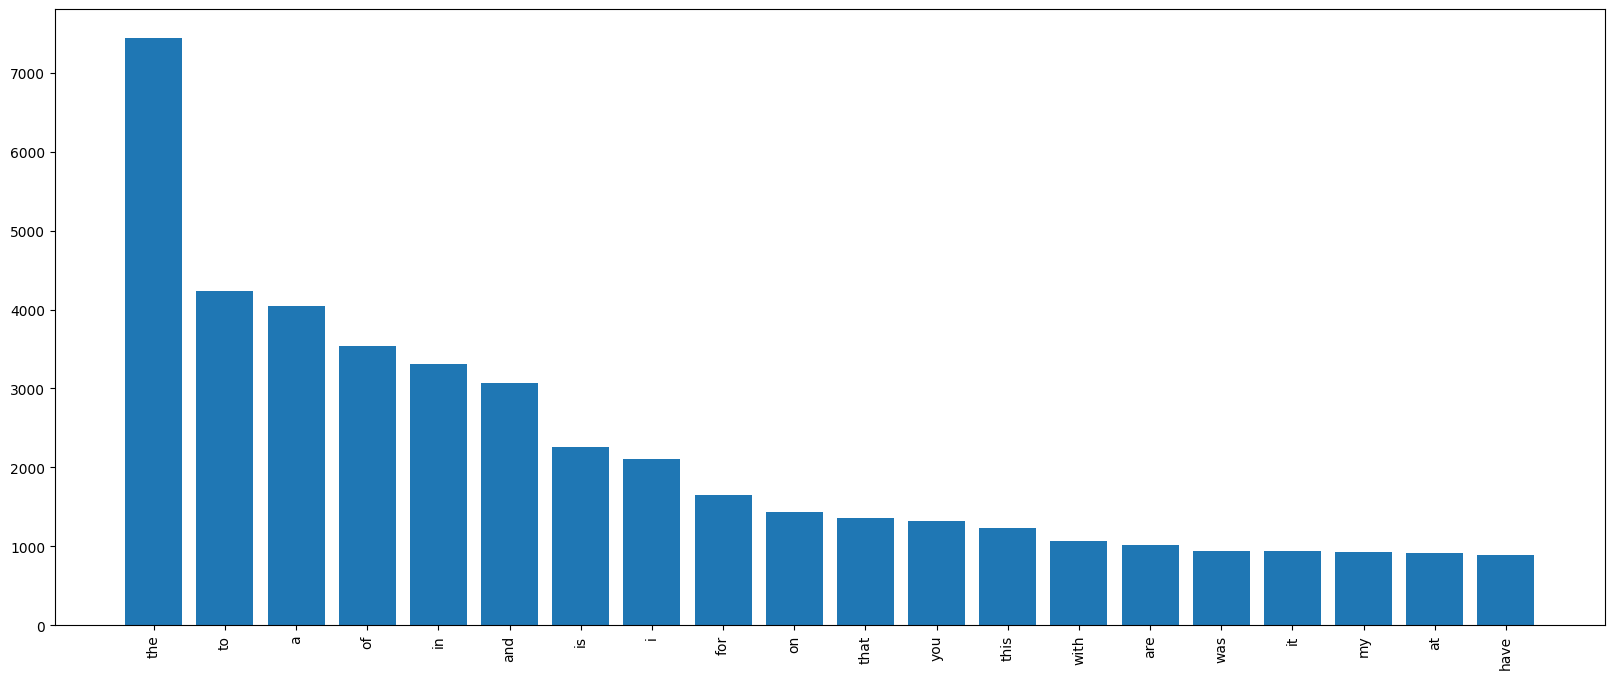

In [ ]:
#Cogemos los tokens sin eliminar las stop words
tokens_=nltk.FreqDist(  tokens )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

El problema de estos gráficos es que no podemos graficar una cantidad tan grandes de palabras, pero también se observa que las palabras graficadas son stop word, son las palabras más frecuentes de los tuits

Size of new BoW title = 39862


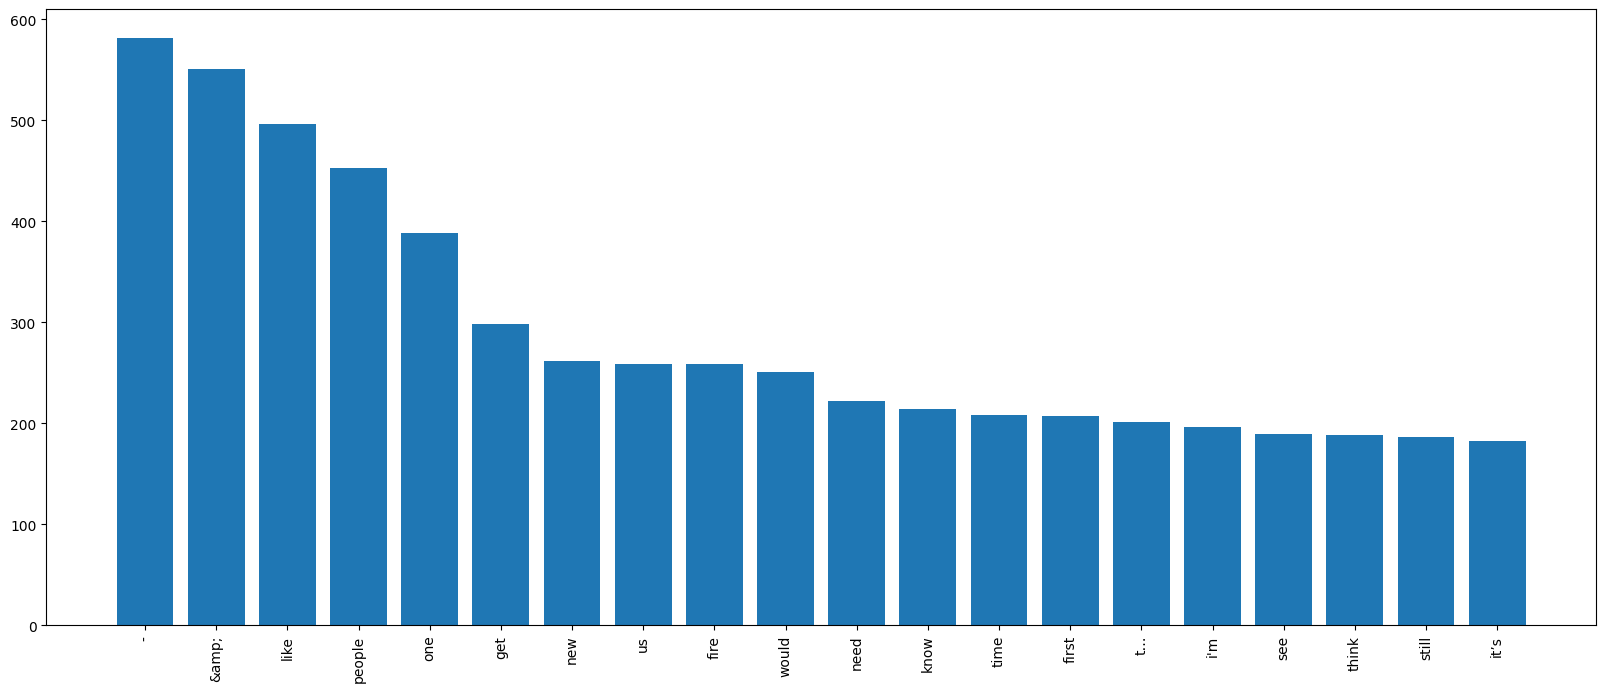

In [ ]:
#Ahora, hacemos el gráfico sin las stop words
tokens_=nltk.FreqDist(tokens_sin_stop )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Cuando eliminamos los stop words, podemos observar que existen muchas palabras que se repiten pero no tienen un significado claro.


Size of new BoW = 35714


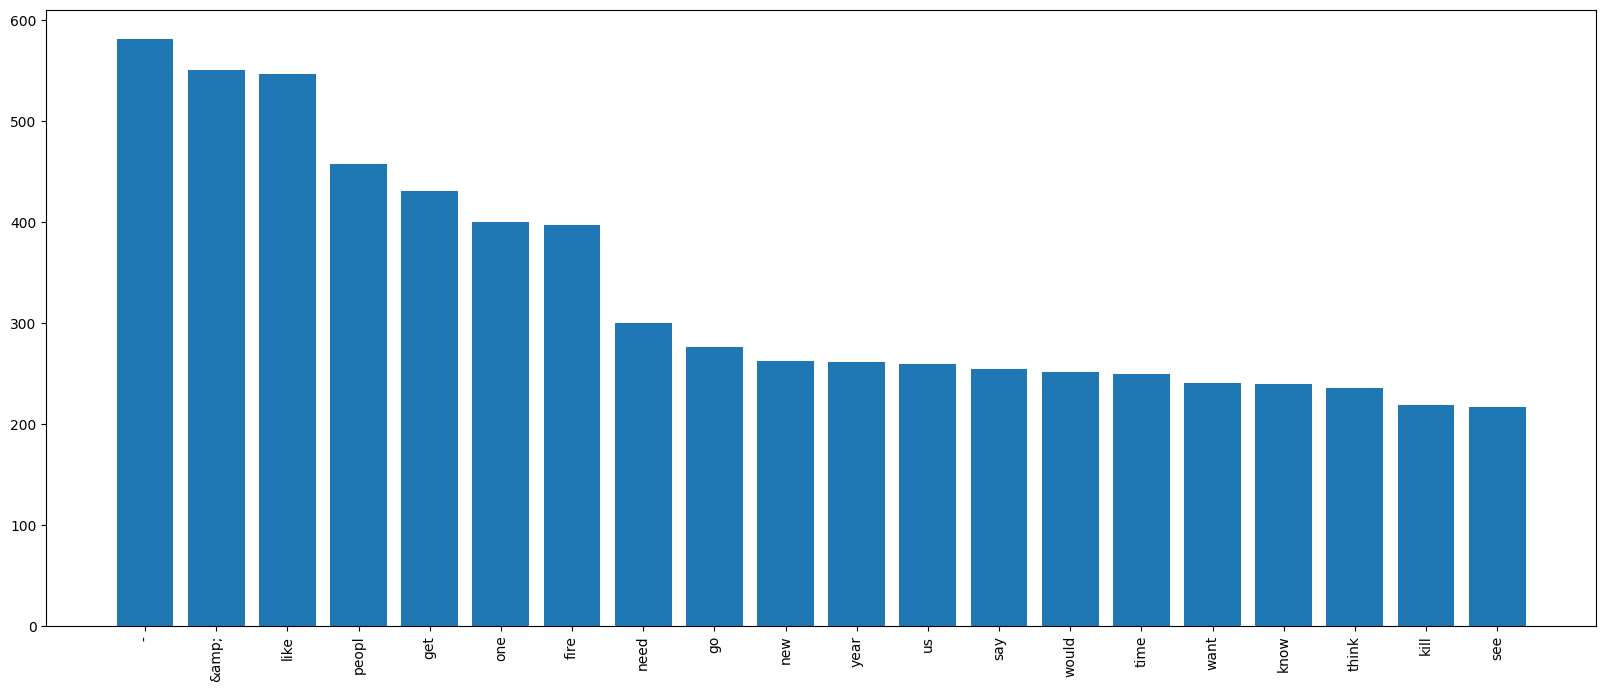

In [ ]:
#Con Stemming
tokens_=nltk.FreqDist(tokens_stem )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW = 38360


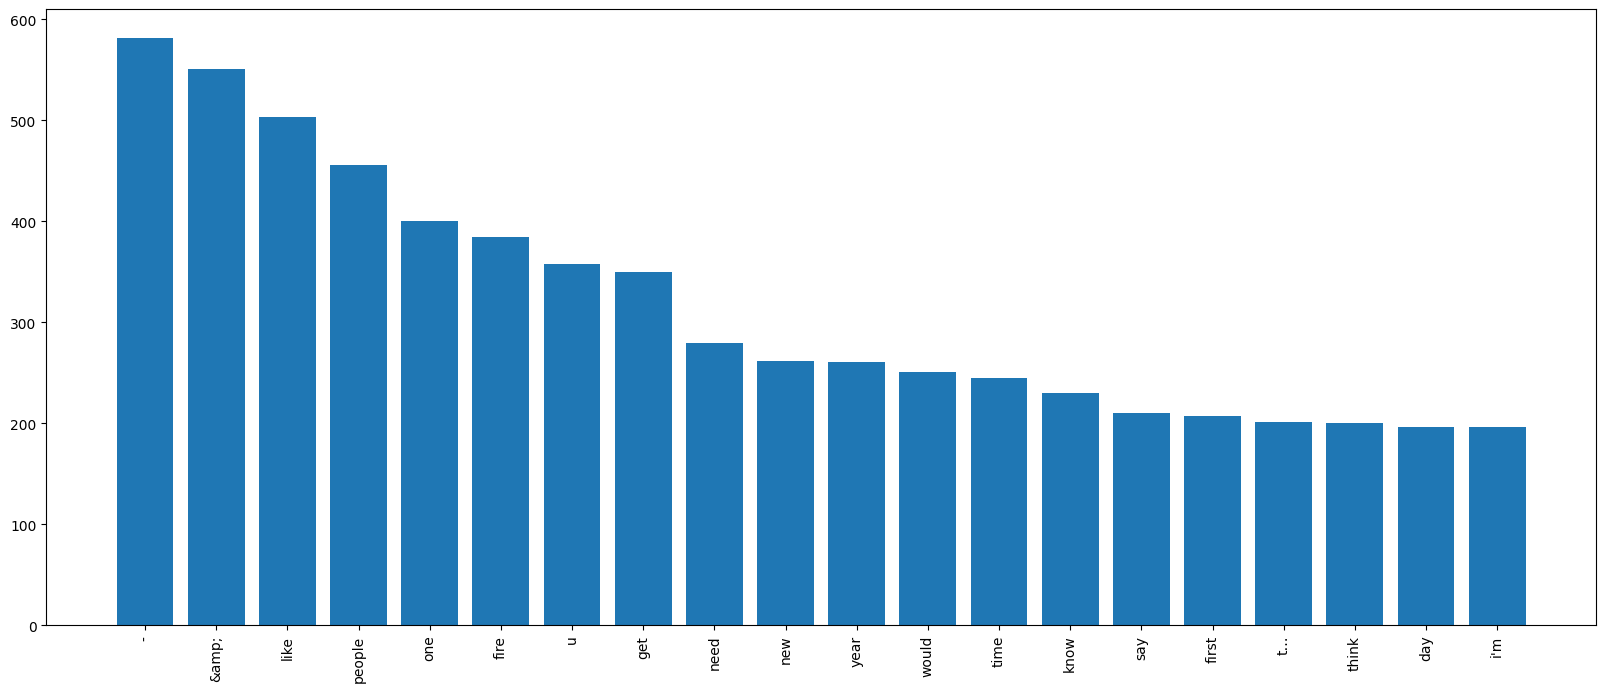

In [ ]:
#Con Lematización
tokens_=nltk.FreqDist(tokens_lemma )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

# Tokenización para tweet

Existe una librería que se utiliza especificamente para tokenización en tweet, esta tienen en cuenta una estructura previa de los tuits.

In [ ]:
#Cogemos todos los tweets y los tokenizamos con la función
tk= TweetTokenizer()
tokens_tweet = tk.tokenize( texto_documentos )
len(set(tokens_tweet))

29315

Size of new BoW title = 29315


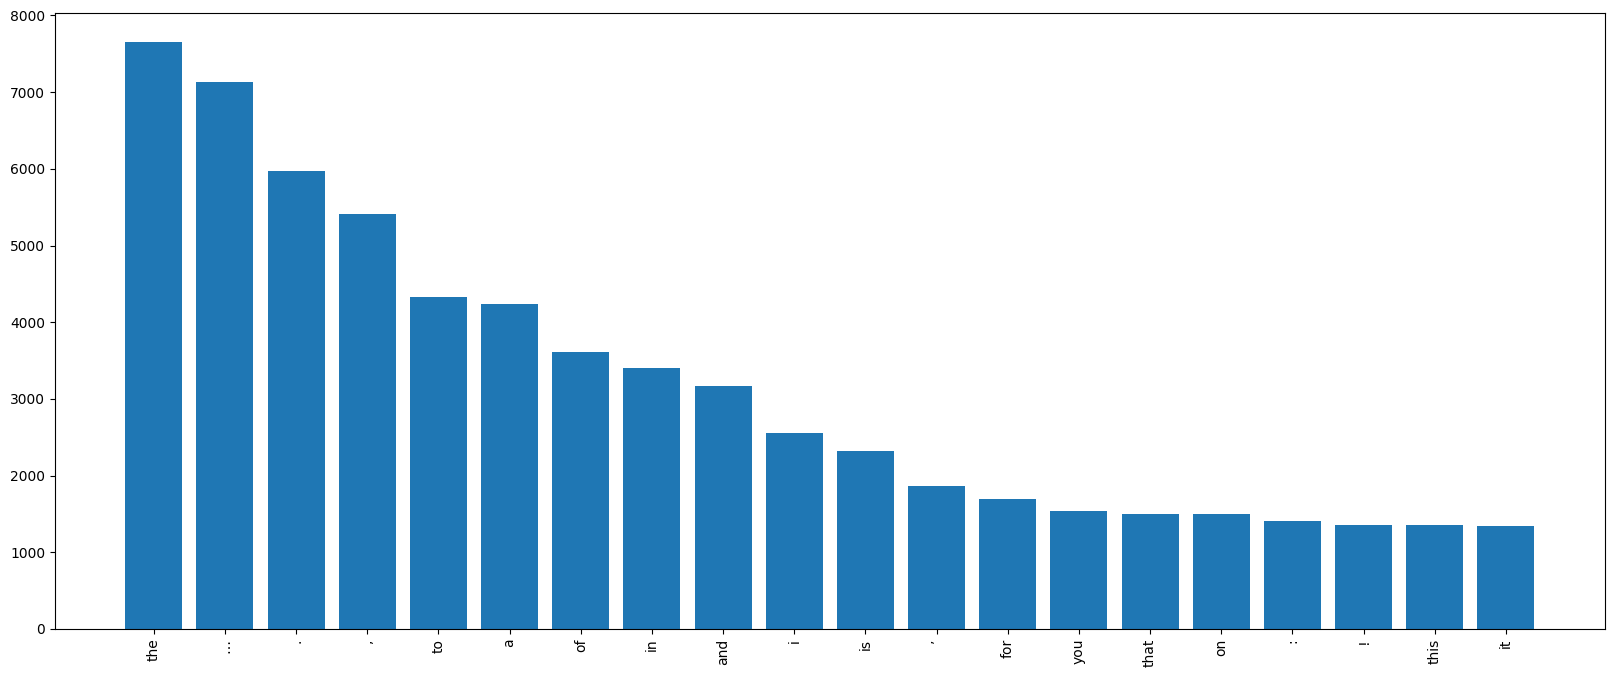

In [ ]:
#Graficamos sin eliminar las stop words
tokens_=nltk.FreqDist(tokens_tweet)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Este método para crear tokens realiza una reducción significativa con el bag of words, sin embargo, se puede realizar una reducción eliminando los stop words ya que estos son los que se repiten con mayor frecuencia.



Size of new BoW title = 29146


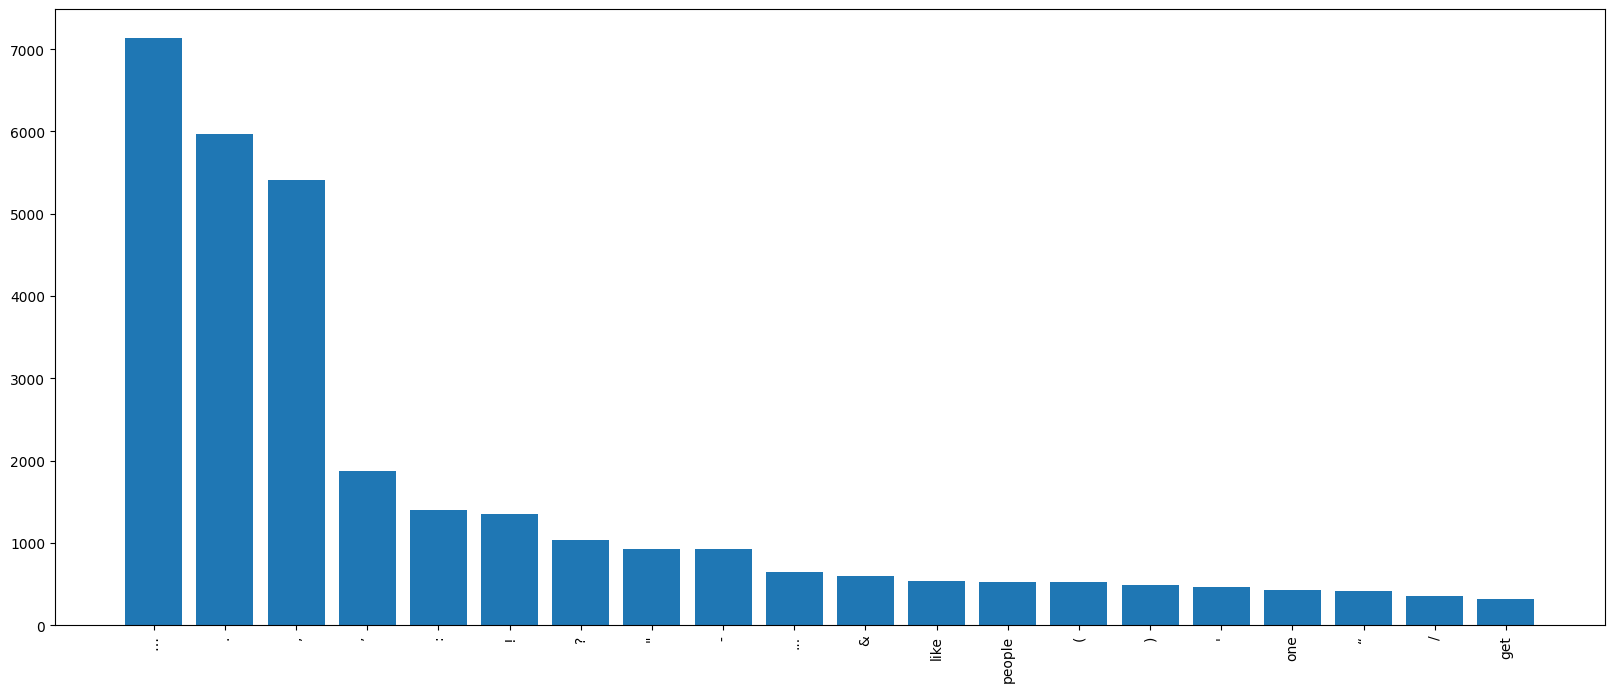

In [ ]:
#Eliminamos los stop words
tokens_tweet_no_stop=[w for w in tokens_tweet if w not in stop_words_nltk_en]
tokens_=nltk.FreqDist(  tokens_tweet_no_stop)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Aca observamos que en general con la mayoría de métodos para crear los tokens se presentan con mayor frecuencia los signos de puntiación. Para esto es necesario realizar un mejor procesamiento en el texto.

¿Cómo podemos hacer para eliminar los simbolos que no nos dan información?

In [ ]:
#Elimina lo que no sea caracter o alfa númerico
print(re.sub(r'[^A-Za-z0-9]+',' ',texto))

#Elimina lo que no sea caracter
print(re.sub(r'[^A-Za-z]+',' ',texto))

#Elimina lo que no sea caracter o alfa númerico, dejando '
print(re.sub(r"[^A-Za-z']+",' ',texto))

communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze 
communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze 
communal violence in bhainsa telangana stones were pelted on muslims' houses and some houses and vehicles were set ablaze 


In [ ]:
texto_documentos_new= re.sub(r'[^A-Za-z]+',' ',texto_documentos)

#Separa por espacios, \n, multiples espacios.
tokens = texto_documentos_new.split( )

#Eliminar stop words
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]

Size of new BoW title = 27389


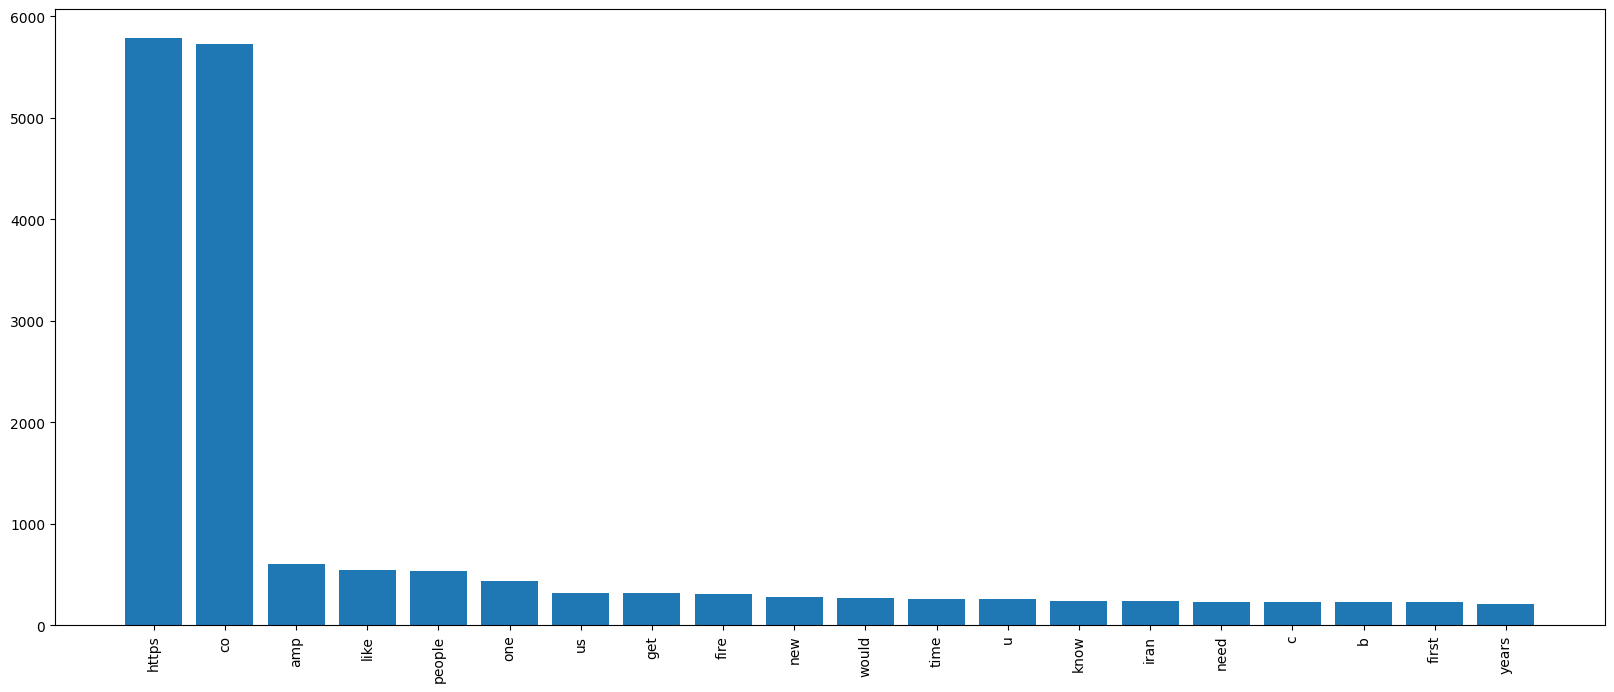

In [ ]:
#Graficamos
tokens_=nltk.FreqDist(tokens_sin_stop)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Se observa que el https es el que mas se repite, esto se debe a que la mayoría de tuits tienen una URL ¿Qué pasa si utilizamos la tokenización de tweet?

¿Cómo se puede quitar la URL del texto?

Size of new BoW title = 27688


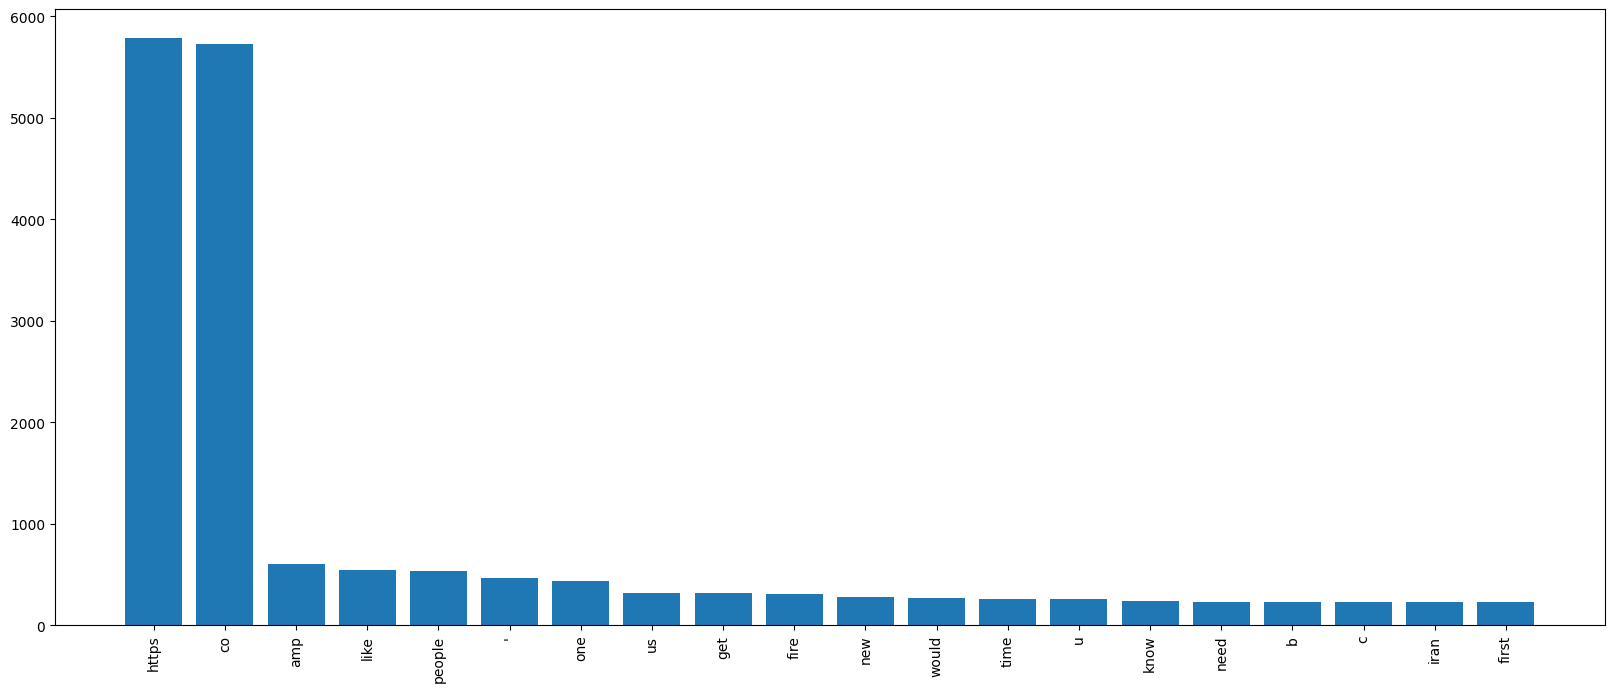

In [ ]:
texto_documentos_new= re.sub(r"[^A-Za-z']+",' ',texto_documentos)
tokens = tk.tokenize( texto_documentos_new )
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]
tokens_=nltk.FreqDist(  tokens_sin_stop)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Termino con el mismo problema porque primero eliminé los simbolos y después lo mandé a eliminar las URL

Size of new BoW title = 20479


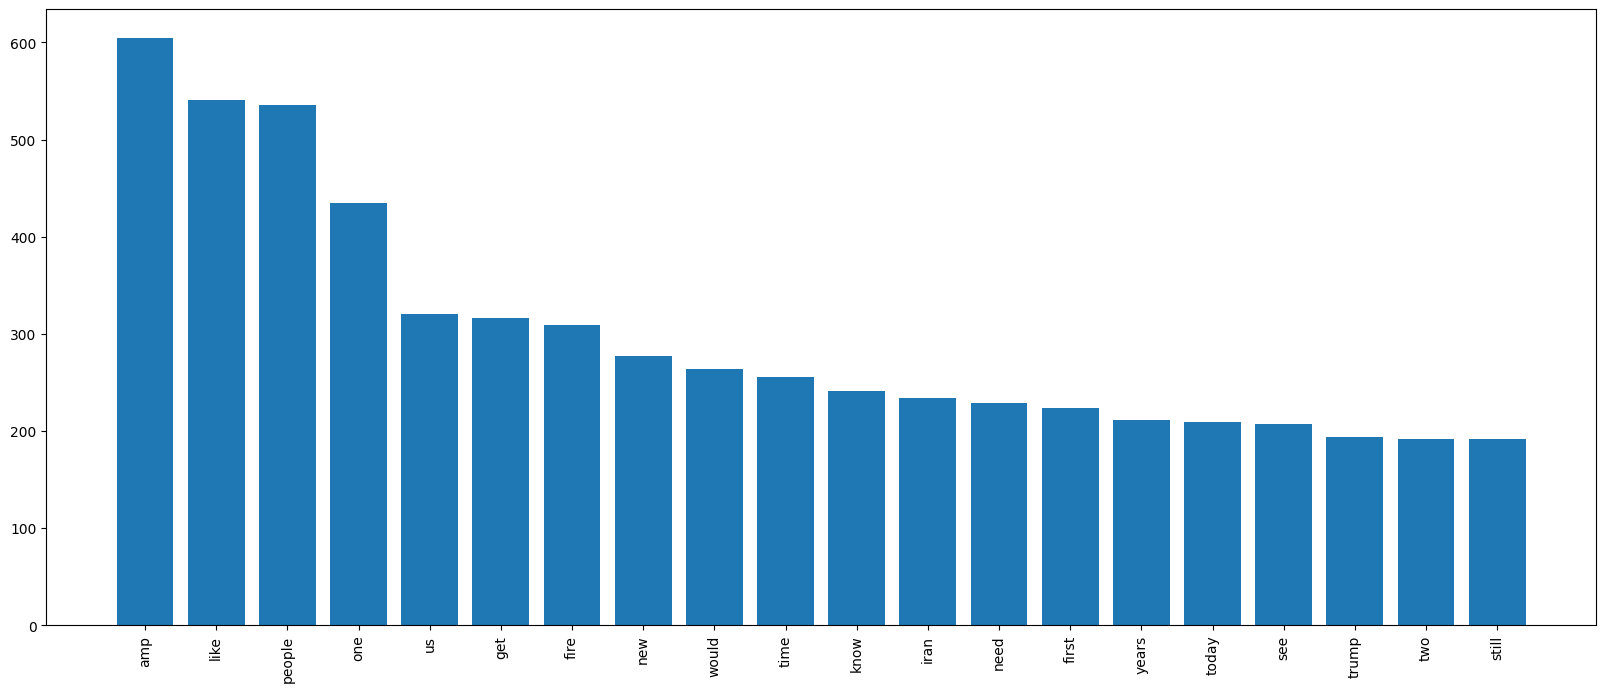

In [ ]:
#Eliminamos los URL's del texto
texto_documentos_new= re.sub(r'https?://\S+|www\.\S+', ' ', texto_documentos)  # eliminar la URL
texto_documentos_new= re.sub(r"[^A-Za-z]+",' ',texto_documentos_new)

tokens = tk.tokenize( texto_documentos_new )
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]
tokens_=nltk.FreqDist(  tokens_sin_stop)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Size of new BoW title = 27688


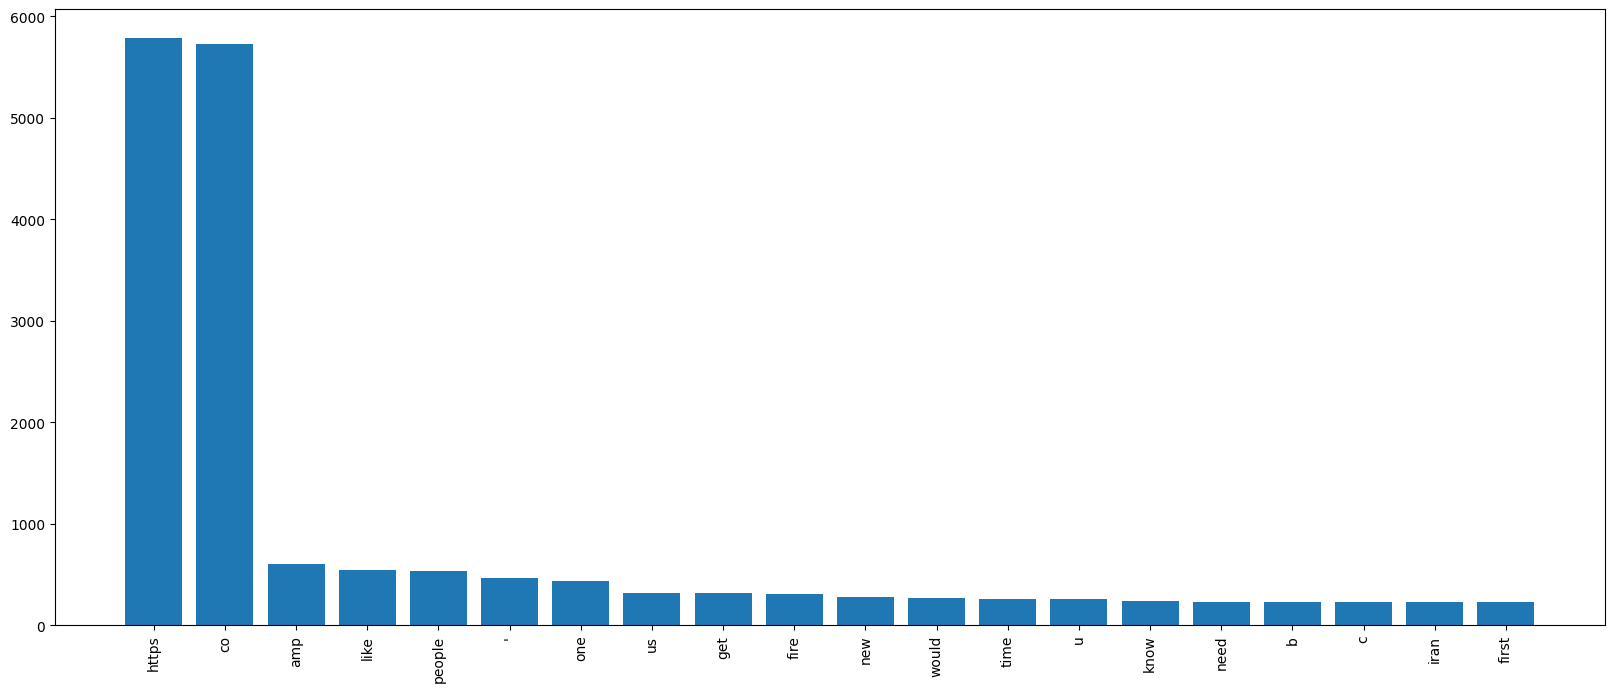

In [ ]:
#Eliminamos los URL's del texto
texto_documentos_new= re.sub(r'https?://\S+|www\.\S+', ' ', texto_documentos_new)  #Eliminar la URL
texto_documentos_new= re.sub(r"[^A-Za-z']+",' ',texto_documentos) #Elimino todos los simbolos

tokens = tk.tokenize( texto_documentos_new )
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en]
tokens_=nltk.FreqDist(  tokens_sin_stop)

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

¿Cuál consideran que es la mejor tokenización?

¿Cuántos tokens hay por tuits?

In [ ]:
texto_prueba = datos_x["text"].iloc[0]
texto_prueba=texto_prueba.lower() # TODO MINUSCULA
texto_documentos_new= re.sub(r'https?://\S+|www\.\S+', ' ', texto_prueba)  # eliminar la URL
texto_documentos_new= re.sub(r"[^A-Za-z]+",' ',texto_documentos_new) # Eliminar simbolos

tokens = tk.tokenize( texto_documentos_new ) # seperacion de tokens
tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en] # eliminacción de stop word
len(tokens_sin_stop)

12

In [ ]:
len_tokens=[ ]
for texto_prueba in datos_x["text"].values:
    texto_prueba=texto_prueba.lower() # TODO MINUSCULA
    texto_documentos_new= re.sub(r'https?://\S+|www\.\S+', ' ', texto_documentos_new)  # eliminar la URL
    texto_documentos_new= re.sub(r"[^A-Za-z]+",' ',texto_prueba) # Eliminar simbolos
    tokens = tk.tokenize( texto_documentos_new ) # seperacion de tokens
    tokens_sin_stop=[w for w in tokens if w not in stop_words_nltk_en] # eliminacción de stop word
    len_tokens.append(len(tokens_sin_stop)) # Cantidad de tokens por tuit

<Axes: >

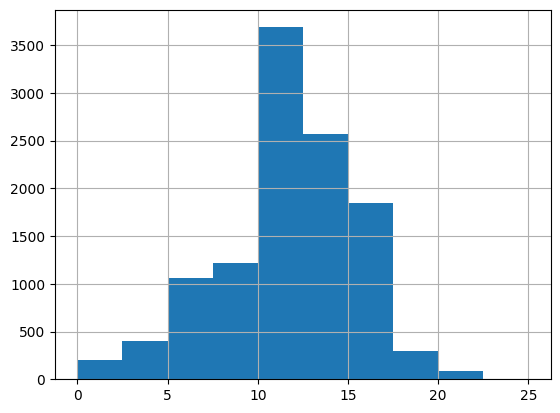

In [ ]:
datos_x["cantidad_tokens"]= len_tokens
datos_x["cantidad_tokens"].hist()

In [ ]:
datos_x["cantidad_tokens"].describe()

,cantidad_tokens
count,11370.000000
mean,11.484169
std,3.706580
min,0.000000
25%,9.000000
50%,12.000000
75%,14.000000
max,25.000000


In [ ]:
(datos_x["cantidad_tokens"]==0).sum()

2

In [ ]:
datos_x["target"]

,target
0,1
1,1
2,1
3,1
4,0
...,...
11365,0
11366,0
11367,0
11368,0


Size of new BoW title = 5947


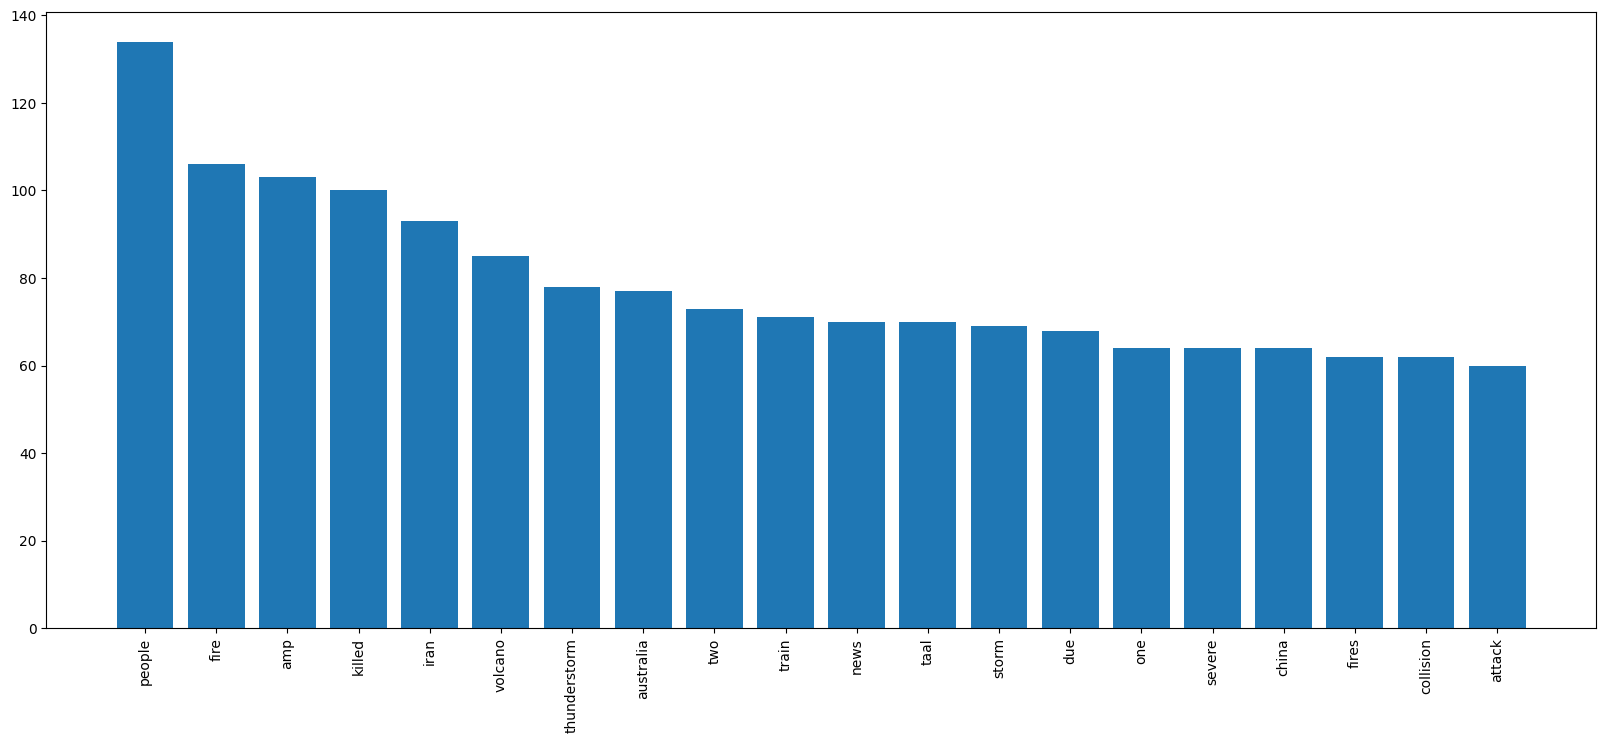

In [ ]:
texto_tweet=' '.join(datos_x.loc[ datos_x["target"]==1, "text"])
texto_tweet=texto_tweet.lower()
texto_tweet= re.sub(r'https?://\S+|www\.\S+', ' ', texto_tweet)  # eliminar la URL
texto_tweet= re.sub(r"[^A-Za-z]+",' ',texto_tweet) # Eliminar simbolos
tokens_tweet = tk.tokenize( texto_tweet ) # seperacion de tokens
tokens_tweet=[w for w in tokens_tweet if w not in stop_words_nltk_en] # eliminacción de stop word
tokens_=nltk.FreqDist(  tokens_tweet)
fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

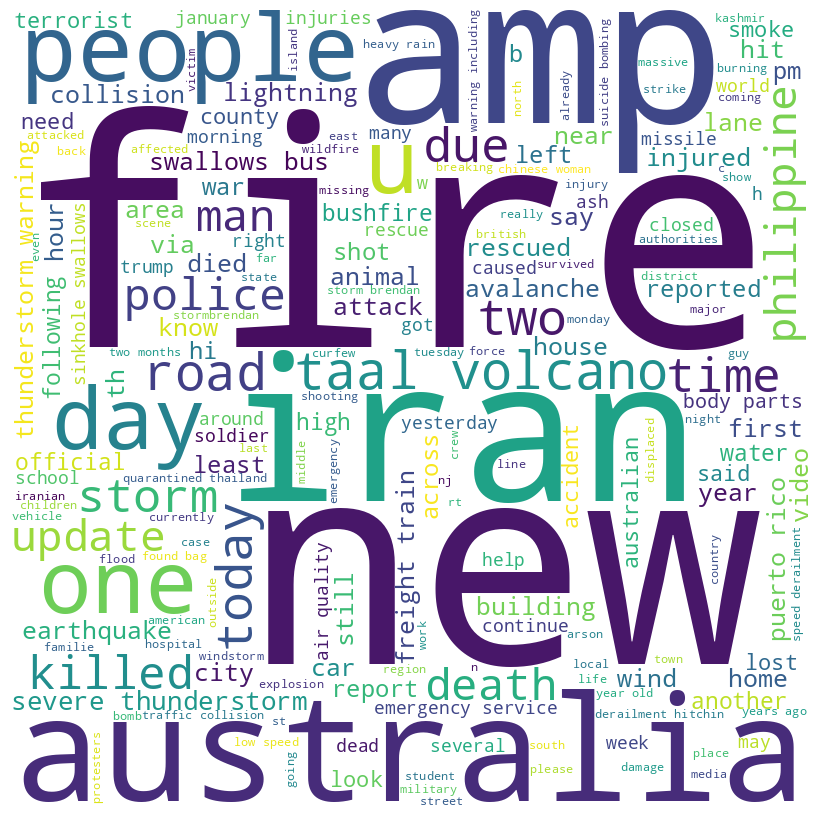

In [ ]:
#Nube de Palabras
texto_tweet=" ".join(tokens_tweet)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_tweet)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Size of new BoW title = 18513


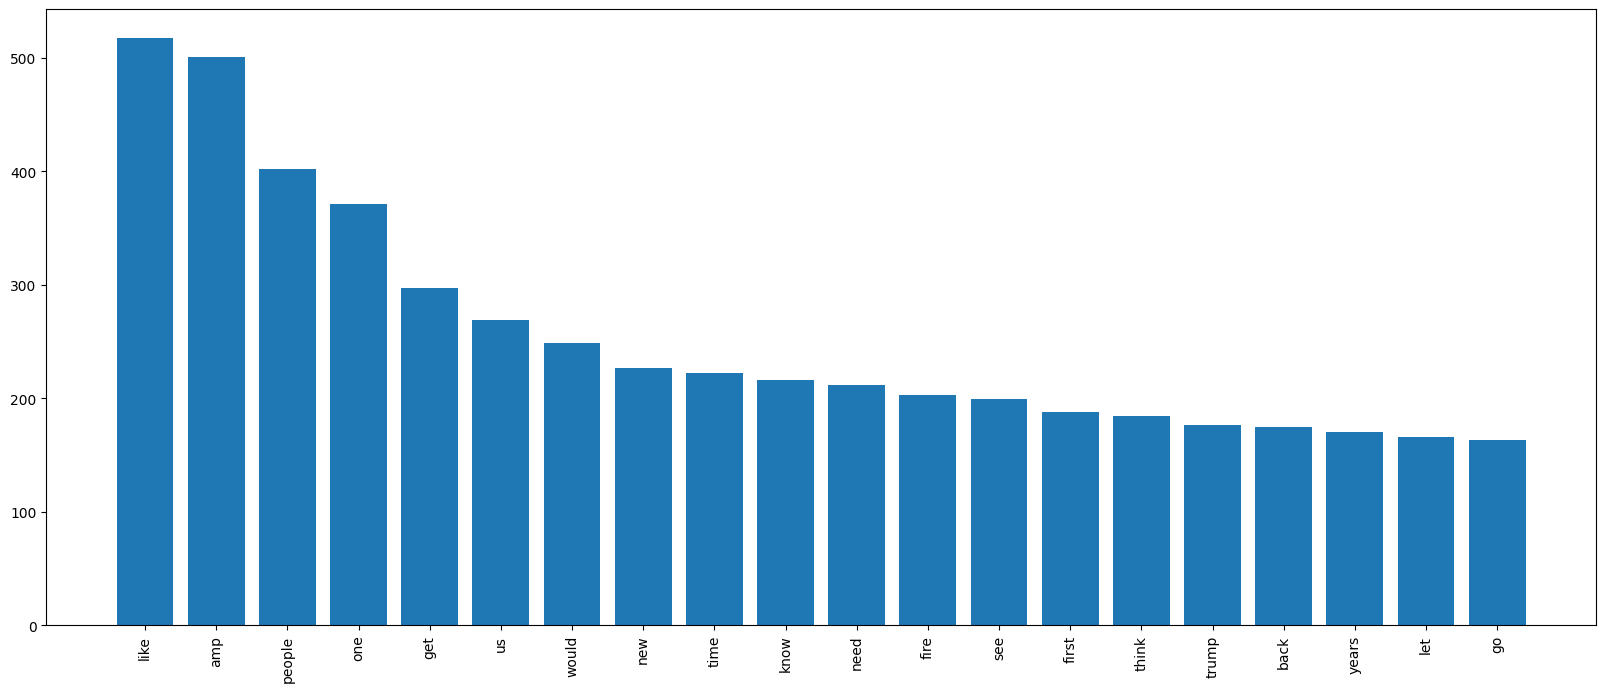

In [ ]:
texto_tweet=' '.join(datos_x.loc[ datos_x["target"]==0, "text"])
texto_tweet=texto_tweet.lower()
texto_tweet= re.sub(r'https?://\S+|www\.\S+', ' ', texto_tweet)  # eliminar la URL
texto_tweet= re.sub(r"[^A-Za-z]+",' ',texto_tweet) # Eliminar simbolos
tokens_tweet = tk.tokenize( texto_tweet ) # seperacion de tokens
tokens_tweet=[w for w in tokens_tweet if w not in stop_words_nltk_en] # eliminacción de stop word
tokens_=nltk.FreqDist(  tokens_tweet)
fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

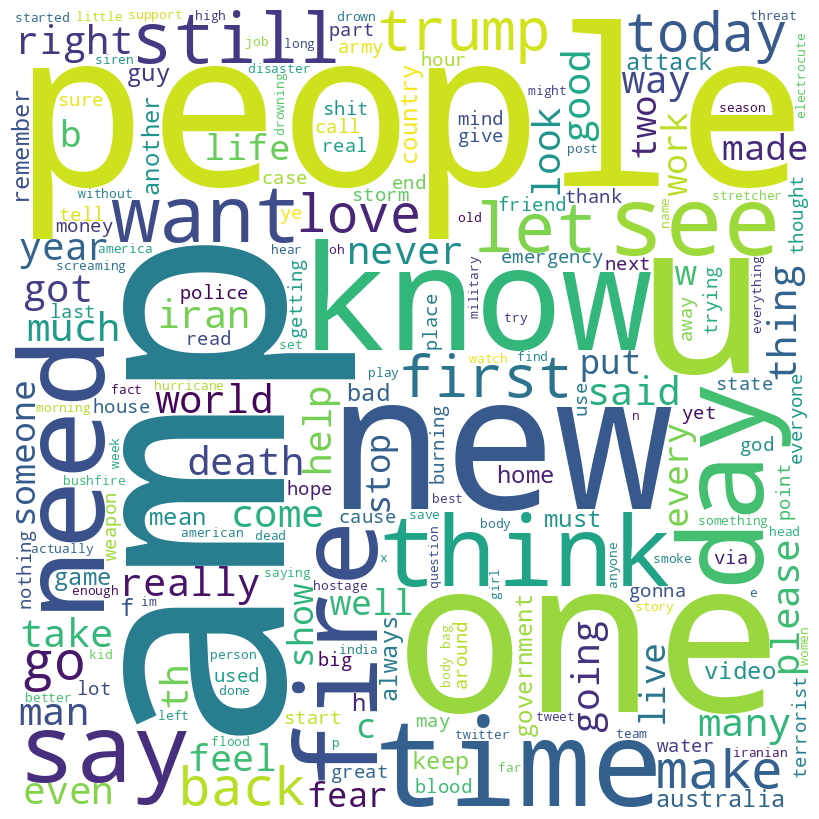

In [ ]:
texto_tweet=" ".join(tokens_tweet)
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_tweet)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()